# Рассчитываем  зависимость энергии тяжелой заряженной частицы (E1) от глубины проникновения (Z(E1)) по формуле:

$$Z(E_1) = \int_{E_1}^{E_{1н}}\frac{dE}{S_e(E) +S_i(E)}$$                           
                          
где  E1 - энергия тяжелой заряженной частицы на глубине  ;  E1н - начальная энергия тяжелой заряженной частицы (ТЗЧ); $S_e(E)$  - тормозные потери энергии ТЗЧ на электронах;  $S_i(E)$ - тормозные потери энергии ТЗЧ на ядрах решетки.

$S_e(E)S_i(E)$-- я использую формулу Формула Бете — Блоха

$E_{1н} = 10MeV/nucl * 56  = 560 MeV$



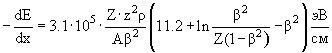

In [80]:
from IPython.display import Image
from math import *
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate as integrate
%matplotlib inline


from scipy.special import expi as Ei
from scipy.optimize import newton


def vect(f):
    return np.vectorize(f)
    


Image(filename='формула1.jpeg')

In [49]:
betta_max = sqrt(560e6*1.6e-12/(9e20*56*1.6e-24))  #энергия в безразмерном параметре
print(betta_max)
mc2_ev = 9e20*56*1.6e-24 *6.24e11  #ev
print(mc2_ev)

def betta_to_ev(b):
    return b**2*mc2_ev


0.10540925533894598
50319360000.0
554770943.9999999


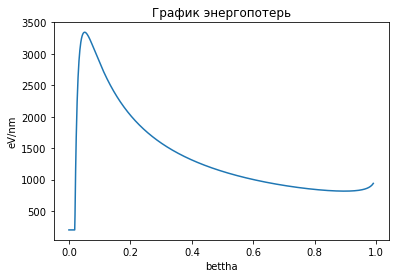

In [50]:
def dEdx(b):      #ev/nm
    z = 26
    A = 56
    rho = 7.8
    if (b>0.019):
        return 3.5e5*(z**3*rho)/(A*b)*(11.2 + log(b**2/(z*(1-b**2))) - b**2)*1e-7
    else:
        return 200    #это для избежания недоразумений --вставить энерго потери медл.движ

mas_b = np.linspace(0.0,0.99,1000)   #график энерго потерь
mas_dEdx =[]
for i in mas_b:
    mas_dEdx.append(dEdx(i))
    
plt.plot(mas_b,mas_dEdx)
plt.title("График энергопотерь")
plt.ylabel("eV/nm")
plt.xlabel("bettha")

def under_int(b):
    return mc2_ev*b/dEdx(b)



nm 140950.93424893258


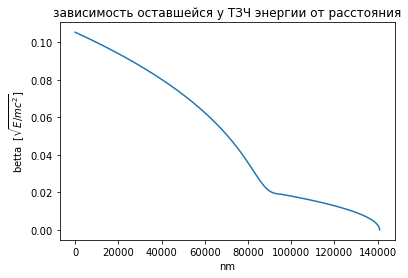

In [51]:
print("nm",scipy.integrate.quad(under_int,0.0,betta_max)[0])  #nm
def residual_E(b):
    return scipy.integrate.quad(under_int,b,betta_max)[0]
mas_b = np.linspace(0.0,betta_max,1000)
mas_dEdx =[]
for i in mas_b:
    mas_dEdx.append(residual_E(i))
    
plt.plot(mas_dEdx,mas_b)
plt.title("зависимость оставшейся у ТЗЧ энергии от расстояния")
plt.xlabel('nm')
plt.ylabel('betta  [$\sqrt{ E/mc^2 }$] ')

# Еще на дробил на мелкие отрезки

пока вышло что до остановки заряд пройдет 9e5 нм или 9е-4 метра 0.9 мм

# Пункт 2 электрический ток на малых временах


посчитать электрический ток по формуле

$$J_q(q,t) = \frac{eS_0}{\pi^2}
\int_I^{\varepsilon_m} \frac{d\varepsilon_0}{\varepsilon_0^2} 
\int_I^{\varepsilon_0} d\varepsilon
\frac{\sqrt{1 - \varepsilon_0/\varepsilon_m}}{\Delta(\varepsilon)
\Sigma(\varepsilon)}
\delta \bigg(t - \int_{\varepsilon}^{\varepsilon_0}  %begin
\frac{d\varepsilon'}{v'\Delta({\varepsilon}')
\Sigma(\varepsilon')}   \bigg)              %end
\frac{1}{r(\varepsilon,\varepsilon_0)}
\frac{q-[q^2 + {r_0}^2(\varepsilon_0)
-r^2(\varepsilon,\varepsilon_0)]/2q}
{\sqrt{r^2(\varepsilon,\varepsilon_0)-
[q-r_0(\varepsilon_0)]^2}
\sqrt{-r^2(\varepsilon,\varepsilon_0)+
[q+r_0(\varepsilon_0)]^2}}
\eta[-r^2(\varepsilon,\varepsilon_0)+
[q+r_0(\varepsilon_0)]^2]
\eta[r^2(\varepsilon,\epsilon_0)-
[q-r_0(\varepsilon_0)]^2]
$$


теперь отдельно! разбирусь
$$\delta \bigg(t - \int_{\varepsilon}^{\varepsilon_0}  %begin
\frac{d\varepsilon'}{v'\Delta({\varepsilon}')
\Sigma(\varepsilon')}   \bigg)              %end
$$ и из нее подынтегральное выражение

из Рязанова известно 
$\Delta({\varepsilon}')
\Sigma(\varepsilon')
=
\frac{\pi Z_2Ne^4}{\varepsilon}ln\frac{\varepsilon}{I} > 0$
это очевидно , сводим к уравнению


$$ 
\widetilde{\varepsilon} = \frac{{\varepsilon_0}}{I}\\\\
1 - \frac{I^2}{\pi Z_2 e^4 t N \sqrt{\frac{2I}{m}}} %интеграл
\int_{\widetilde{\varepsilon}} ^\widetilde{\varepsilon_0}
\frac{\sqrt{x}dx}{ln x}
=
0\\
\varepsilon_m
=
4mE_1/M = 1120000.0 eV = 1.12 MeV
$$
$\varepsilon_m$ максимальная энергия дельта электрона
$$



In [8]:
I = 8                     #эв
rho = 7.8                 # гр/см3
N = rho/(1.66e-24*56)     #1|cm3
m_e = 9.1e-28            #гр
e = 4.8e-10             #эд СГСЭ
Z_2 = 26                  #порядковый номер мишени 
eps_til_max = 140000.     #-
ev_to_erg = 1.6e-12
t=1e-18
Const = (I*ev_to_erg)**2/(pi*Z_2*e**4*N*sqrt(2*I*ev_to_erg/m_e))

$$1 - \frac{I^2}{\pi Z_2 e^4 t N \sqrt{\frac{2I}{m}}} 
\int_{\widetilde{\varepsilon}} ^\widetilde{\varepsilon_0}
\frac{\sqrt{x}dx}{ln x}
=
0\\
1 - \frac{I^2}{\pi Z_2 e^4 t N \sqrt{\frac{2I}{m}}}
\bigg(Ei(\frac{3}{2}Ln(\frac{\varepsilon_0}{I}) )
-
Ei(\frac{3}{2}Ln(\frac{\varepsilon_1}{I}))\bigg)
=
0
$$

In [100]:
@vect
def statement(eps_down,eps_up,t):
    return 1 - Const/t * (Ei(3/2 *log(eps_up)) - Ei(3/2 * log(eps_down)))
@vect
def find_eps_down(eps_up,t):
    return newton(statement,eps_up,args=(eps_up,t))


mas_up = np.linspace(1.01,200,1000)
mas_down = []
for i in mas_up:
    mas_down.append(find_eps_down(i,2e-16))
    
plt.plot(mas_up,mas_down)

ValueError: math domain error

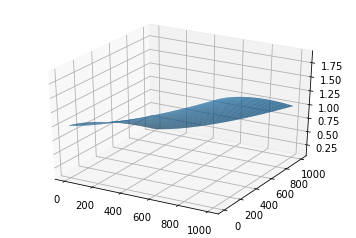

In [99]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
X, Y = np.meshgrid(list(range(3,1000)), list(range(3,1000)))
Z = statement(X,Y,1e-14)

# Express the mesh in the cartesian system.


# Plot the surface.
ax.plot_surface(X, Y, Z)



plt.show()

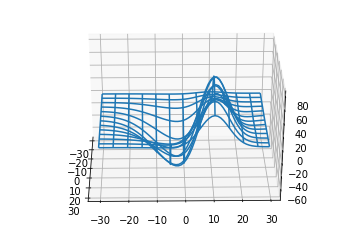

In [96]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load some test data for demonstration and plot a wireframe
X, Y, Z = axes3d.get_test_data(0.1)
ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.1)